<a href="https://colab.research.google.com/github/Atharva3176/StockPredictionSystem/blob/main/Stock_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls drive/MyDrive/trading

DAT_MT_XAUUSD_M1_2010.csv  DAT_MT_XAUUSD_M1_2015.csv  DAT_MT_XAUUSD_M1_2020.csv
DAT_MT_XAUUSD_M1_2011.csv  DAT_MT_XAUUSD_M1_2016.csv  DAT_MT_XAUUSD_M1_2021.csv
DAT_MT_XAUUSD_M1_2012.csv  DAT_MT_XAUUSD_M1_2017.csv  DAT_MT_XAUUSD_M1_2022.csv
DAT_MT_XAUUSD_M1_2013.csv  DAT_MT_XAUUSD_M1_2018.csv  DAT_MT_XAUUSD_M1_2023.csv
DAT_MT_XAUUSD_M1_2014.csv  DAT_MT_XAUUSD_M1_2019.csv


In [ ]:
files = glob("drive/MyDrive/trading/*.csv")
files.sort(key=lambda x: int(x.removesuffix(".csv")[-4:]))
print(files)
dfs = []
for file in files[:1]:
  df = pd.read_csv(file, names=[str(i) for i in range(7)])
  dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
print(df)

['drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2010.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2011.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2012.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2013.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2014.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2015.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2016.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2017.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2018.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2019.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2020.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2021.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2022.csv', 'drive/MyDrive/trading/DAT_MT_XAUUSD_M1_2023.csv']
                 0      1        2        3        4        5  6
0       2010.01.03  18:00  1098.45  1098.60  1098.05  1098.05  0
1       2010.01.03  18:01  1098.10  1099.55  1098.05  1099.55  0
2       2010.01.03  18:02  1099.60  1099.80  1099.05  1099.20  0
3       2010.01.03  18:03

Epoch 1/10
6924/6924 [==============================] - 139s 18ms/step - loss: 0.0720 - mae: 0.1601 - val_loss: 0.0571 - val_mae: 0.1399
Epoch 2/10
6924/6924 [==============================] - 123s 18ms/step - loss: 0.0679 - mae: 0.1549 - val_loss: 0.0580 - val_mae: 0.1435
Epoch 3/10
6924/6924 [==============================] - 122s 18ms/step - loss: 0.0668 - mae: 0.1538 - val_loss: 0.0558 - val_mae: 0.1374
Epoch 4/10
6924/6924 [==============================] - 122s 18ms/step - loss: 0.0665 - mae: 0.1535 - val_loss: 0.0558 - val_mae: 0.1380
Epoch 5/10
6924/6924 [==============================] - 120s 17ms/step - loss: 0.0664 - mae: 0.1534 - val_loss: 0.0555 - val_mae: 0.1375
Epoch 6/10
6924/6924 [==============================] - 118s 17ms/step - loss: 0.0663 - mae: 0.1532 - val_loss: 0.0556 - val_mae: 0.1387
Epoch 7/10
6924/6924 [==============================] - 121s 18ms/step - loss: 0.0662 - mae: 0.1530 - val_loss: 0.0552 - val_mae: 0.1370
Epoch 8/10
6924/6924 [===================

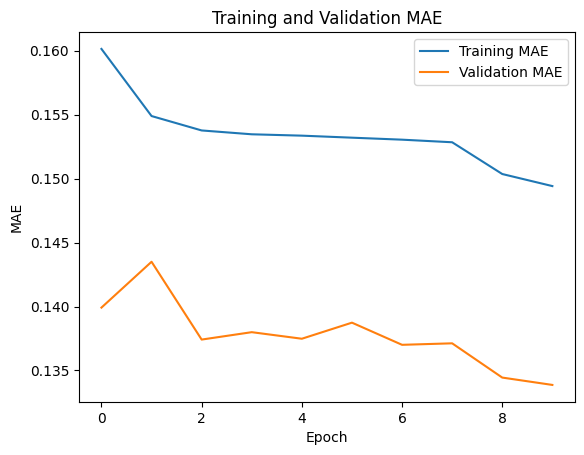

In [ ]:


# Function to create sequences of input and target
def create_sequences(data, window_size, selected_columns):
    X, y = [], []
    for i in range(len(data) - window_size):
        window_data = data[i: i + window_size, selected_columns]
        window_data -= data[i+1: i + window_size + 1, selected_columns]
        window_data, target_data = window_data[:-1], window_data[-1]
        X.append(window_data)
        y.append(target_data)
    return np.array(X), np.array(y)

# Set window size and selected columns indices
window_size = 5
# Create sequences
X_seq, y_seq = create_sequences(df.iloc[:, [2, 3, 4, 5]].values.astype(np.float32), window_size, [0, 1, 2, 3])
# def custom_normalize(data):
#     mean = np.mean(data, axis=(0, 1))
#     std = np.std(data, axis=(0, 1))
#     return (data - mean) / std

# Normalize the features using the custom method
# X_seq_normalized = custom_normalize(X_seq)

# Define a custom normalization method for the target variable
# def custom_normalize_target(data):
#     mean = np.mean(data, axis=0)
#     std = np.std(data, axis=0)
#     return (data - mean) / std

# Normalize the target variable using the custom method
# y_seq_normalized = custom_normalize_target(y_seq)

selected_columns_indices = [0, 1, 2, 3]
split_index = int(len(df)*0.8)
# Split the data into training and testing sets
X_train, y_train = X_seq[:split_index], y_seq[:split_index]
X_test, y_test = X_seq[split_index:], y_seq[split_index:]

# Define the neural network model
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(window_size - 1, len(selected_columns_indices))))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(16, return_sequences=True))
model.add(layers.LSTM(16, return_sequences=True))
model.add(layers.LSTM(8))
model.add(layers.Dense(len(selected_columns_indices)))  # Output layer for regression with units matching the selected columns

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training and validation accuracy
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

2164/2164 [==============================] - 16s 7ms/step
Predicted: [[-0.04571538 -0.0171692  -0.029294   -0.00188492]
 [ 0.03021009 -0.01348421  0.02079868 -0.00154327]
 [ 0.0326029   0.05515491  0.02684212 -0.00138376]
 ...
 [-0.01905745 -0.0191023  -0.00330285 -0.00179108]
 [-0.11601476 -0.02873484 -0.08997983 -0.00258351]
 [-0.04970484 -0.02672978 -0.0461698  -0.001812  ]]
Expected: [[-0.01790339  0.05010719 -0.00092151  0.05010719]
 [-0.00092151 -0.0859555  -0.00092151 -0.00092151]
 [ 0.01606038  0.10109437 -0.00092151 -0.00092151]
 ...
 [ 0.03312531 -0.06897362  0.03312531 -0.06897362]
 [-0.05195021 -0.00092151 -0.03496832 -0.00092151]
 [-0.0859555  -0.01790339 -0.00092151  0.03312531]]
Mean Absolute Error on Test Set: 0.05846817046403885


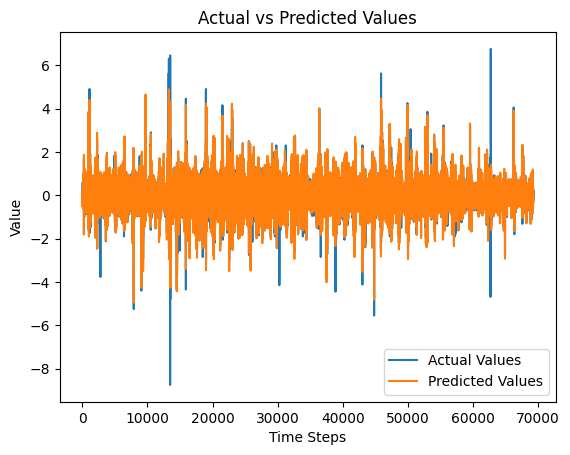

In [ ]:
X_test, y_test = X_seq[split_index:], y_seq[split_index:]

out = np.array([[1338.690000,1338.690000,1338.570000,1338.570000]], dtype='float32')
y_pred_normalized = model.predict(X_test)

# Denormalize the predictions to get them in the original scale
y_pred_denormalized = y_pred_normalized * np.std(y_seq) + np.mean(y_seq)

# Optionally, denormalize the actual test set values as well for comparison
y_test_denormalized = y_test * np.std(y_seq) + np.mean(y_seq)
print(f"Predicted: {y_pred_denormalized}")
print(f"Expected: {y_test_denormalized}")
y_test_denormalized = y_test * np.std(y_seq) + np.mean(y_seq)

# Evaluate the predictions (for example, using Mean Absolute Error)
mae = np.mean(np.abs(y_test_denormalized - y_pred_denormalized))
print(f'Mean Absolute Error on Test Set: {mae}')

# Visualize the predictions and actual values
plt.plot(y_test[:, 0], label='Actual Values')
plt.plot(y_pred_normalized[:, 0], label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
model.save("meow.keras")